In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import string
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report
import datetime
from PIL import Image
from keras.datasets import cifar10
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
from tensorflow.keras.layers import Input, Conv2D, ReLU, BatchNormalization, \
                                    Add, AveragePooling2D, Flatten, Dense, Dropout, Activation,MaxPooling2D
import tensorflow.keras.layers as layers
from keras.models import Sequential
import tensorflow.keras.optimizers
import seaborn as sns
from sklearn.utils import class_weight
import keras as k

#Loading and Visulizing

## Loading

In [2]:
#Loading Data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 6s 0us/step


## Visualizing

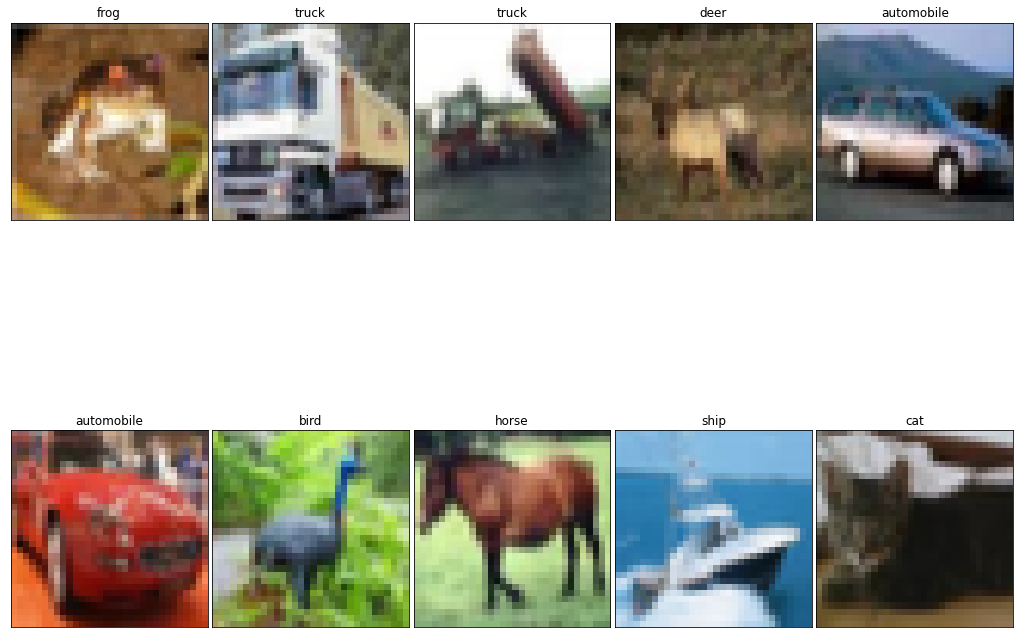

In [3]:
#showing the Data
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
fig , ax = plt.subplots(nrows=2, ncols= 5, figsize = (14, 14), sharex=True, sharey=True)
ax = ax.flatten()

for i, a in enumerate(ax):   
    a.imshow(X_train[i])
    a.set(title = class_names[int(y_train[i])])
ax[0].set_yticks([])
ax[0].set_xticks([])
plt.tight_layout(0.1)
plt.grid(False)

## PreProccesing

# New Section

In [4]:
#Convering Type
train_images = X_train.astype('float32')
test_images = X_test.astype('float32')

# Standardizing
train_images = train_images / 255
test_images = test_images / 255

# One hot encoding the target class
num_classes = 10
train_labels = np_utils.to_categorical(y_train, num_classes)
test_labels = np_utils.to_categorical(y_test, num_classes)

# Question 1

## Creating model

In [24]:
model = Sequential()

model.add(Input(shape = (32, 32, 3)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))    # num_classes = 10

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 3072)              0         
                                                                 
 dense_18 (Dense)            (None, 128)               393344    
                                                                 
 batch_normalization_10 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 dropout_10 (Dropout)        (None, 128)               0         
                                                                 
 dense_19 (Dense)            (None, 64)                8256      
                                                                 
 batch_normalization_11 (Bat  (None, 64)               256       
 chNormalization)                                     

## Training model

### first try (batch_normalization and dropout included!)

In [19]:
#scheduling the learning rate
lr_schedule = tensorflow.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=10000,
    decay_rate=0.9)
#Setting optmizer
optimizer = tensorflow.keras.optimizers.SGD(learning_rate=lr_schedule)

#compiling the model
model.compile(optimizer= optimizer,
            loss='categorical_crossentropy', metrics=['acc'])

history = model.fit(train_images, train_labels, batch_size=64, epochs=150,
                    validation_data=(test_images, test_labels))

Epoch 1/150
782/782 [==============================] - 6s 7ms/step - loss: 2.9411 - acc: 0.1675 - val_loss: 2.0064 - val_acc: 0.3011
Epoch 2/150
782/782 [==============================] - 5s 6ms/step - loss: 2.5724 - acc: 0.2114 - val_loss: 1.8888 - val_acc: 0.3360
Epoch 3/150
782/782 [==============================] - 5s 6ms/step - loss: 2.3980 - acc: 0.2338 - val_loss: 1.8433 - val_acc: 0.3544
Epoch 4/150
782/782 [==============================] - 5s 6ms/step - loss: 2.2782 - acc: 0.2483 - val_loss: 1.8035 - val_acc: 0.3675
Epoch 5/150
782/782 [==============================] - 5s 6ms/step - loss: 2.2014 - acc: 0.2586 - val_loss: 1.7676 - val_acc: 0.3786
Epoch 6/150
782/782 [==============================] - 5s 6ms/step - loss: 2.1419 - acc: 0.2706 - val_loss: 1.7676 - val_acc: 0.3804
Epoch 7/150
782/782 [==============================] - 5s 6ms/step - loss: 2.0947 - acc: 0.2790 - val_loss: 1.7540 - val_acc: 0.3821
Epoch 8/150
782/782 [==============================] - 5s 6ms/step - 

### Second try (batch_normalization and dropout included!)

In [22]:
#Setting optmizer
optimizer = tensorflow.keras.optimizers.SGD(learning_rate=0.001)

#compiling the model
model.compile(optimizer= optimizer,
            loss='categorical_crossentropy', metrics=['acc'])

history = model.fit(train_images, train_labels, batch_size=128, epochs=80,
                    validation_data=(test_images, test_labels))

Epoch 1/80
391/391 [==============================] - 4s 7ms/step - loss: 2.9817 - acc: 0.1519 - val_loss: 2.0890 - val_acc: 0.2447
Epoch 2/80
391/391 [==============================] - 2s 6ms/step - loss: 2.6645 - acc: 0.1906 - val_loss: 1.9626 - val_acc: 0.2982
Epoch 3/80
391/391 [==============================] - 2s 6ms/step - loss: 2.5185 - acc: 0.2181 - val_loss: 1.9042 - val_acc: 0.3244
Epoch 4/80
391/391 [==============================] - 2s 6ms/step - loss: 2.4226 - acc: 0.2297 - val_loss: 1.8961 - val_acc: 0.3227
Epoch 5/80
391/391 [==============================] - 2s 6ms/step - loss: 2.3366 - acc: 0.2419 - val_loss: 1.8313 - val_acc: 0.3494
Epoch 6/80
391/391 [==============================] - 2s 6ms/step - loss: 2.2789 - acc: 0.2473 - val_loss: 1.8085 - val_acc: 0.3526
Epoch 7/80
391/391 [==============================] - 2s 6ms/step - loss: 2.2241 - acc: 0.2567 - val_loss: 1.7936 - val_acc: 0.3643
Epoch 8/80
391/391 [==============================] - 2s 6ms/step - loss: 2.

## الف

In [31]:
from datetime import datetime


model = Sequential()

model.add(Input(shape = (32, 32, 3)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))    # num_classes = 10

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 3072)              0         
                                                                 
 dense_30 (Dense)            (None, 128)               393344    
                                                                 
 dense_31 (Dense)            (None, 64)                8256      
                                                                 
 dense_32 (Dense)            (None, 10)                650       
                                                                 
Total params: 402,250
Trainable params: 402,250
Non-trainable params: 0
_________________________________________________________________


### batch_size = 32

In [28]:
#Setting optmizer
optimizer = tensorflow.keras.optimizers.SGD(learning_rate=0.001)

#compiling the model
model.compile(optimizer= optimizer,
            loss='categorical_crossentropy', metrics=['acc'])
start = datetime.now()
history = model.fit(train_images, train_labels, batch_size=32, epochs=50,
                    validation_data=(test_images, test_labels))

print(f'execution time  = {datetime.now() - start}')

Epoch 1/50
1563/1563 [==============================] - 8s 5ms/step - loss: 2.1238 - acc: 0.2325 - val_loss: 2.0078 - val_acc: 0.2881
Epoch 2/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.9495 - acc: 0.3103 - val_loss: 1.9126 - val_acc: 0.3242
Epoch 3/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.8812 - acc: 0.3397 - val_loss: 1.8644 - val_acc: 0.3438
Epoch 4/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.8394 - acc: 0.3555 - val_loss: 1.8230 - val_acc: 0.3640
Epoch 5/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.8080 - acc: 0.3670 - val_loss: 1.8010 - val_acc: 0.3714
Epoch 6/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.7806 - acc: 0.3781 - val_loss: 1.7734 - val_acc: 0.3758
Epoch 7/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.7565 - acc: 0.3875 - val_loss: 1.7491 - val_acc: 0.3898
Epoch 8/50
1563/1563 [==============================] - 7s 4ms

### batch_size = 64

In [30]:
#Setting optmizer
optimizer = tensorflow.keras.optimizers.SGD(learning_rate=0.001)

#compiling the model
model.compile(optimizer= optimizer,
            loss='categorical_crossentropy', metrics=['acc'])
start = datetime.now()
history = model.fit(train_images, train_labels, batch_size=64, epochs=50,
                    validation_data=(test_images, test_labels))

print(f'execution time  = {datetime.now() - start}')

Epoch 1/50
782/782 [==============================] - 4s 5ms/step - loss: 2.1909 - acc: 0.1981 - val_loss: 2.1027 - val_acc: 0.2381
Epoch 2/50
782/782 [==============================] - 4s 5ms/step - loss: 2.0534 - acc: 0.2594 - val_loss: 2.0138 - val_acc: 0.2672
Epoch 3/50
782/782 [==============================] - 4s 5ms/step - loss: 1.9827 - acc: 0.2918 - val_loss: 1.9578 - val_acc: 0.3016
Epoch 4/50
782/782 [==============================] - 4s 5ms/step - loss: 1.9340 - acc: 0.3179 - val_loss: 1.9165 - val_acc: 0.3144
Epoch 5/50
782/782 [==============================] - 4s 5ms/step - loss: 1.8976 - acc: 0.3314 - val_loss: 1.8866 - val_acc: 0.3330
Epoch 6/50
782/782 [==============================] - 3s 4ms/step - loss: 1.8689 - acc: 0.3447 - val_loss: 1.8611 - val_acc: 0.3468
Epoch 7/50
782/782 [==============================] - 3s 4ms/step - loss: 1.8446 - acc: 0.3533 - val_loss: 1.8368 - val_acc: 0.3532
Epoch 8/50
782/782 [==============================] - 3s 4ms/step - loss: 1.

### batch_size = 256

In [32]:
#Setting optmizer
optimizer = tensorflow.keras.optimizers.SGD(learning_rate=0.001)

#compiling the model
model.compile(optimizer= optimizer,
            loss='categorical_crossentropy', metrics=['acc'])
start = datetime.now()
history = model.fit(train_images, train_labels, batch_size=256, epochs=50,
                    validation_data=(test_images, test_labels))

print(f'execution time  = {datetime.now() - start}')

Epoch 1/50
196/196 [==============================] - 2s 9ms/step - loss: 2.2545 - acc: 0.1469 - val_loss: 2.1992 - val_acc: 0.1845
Epoch 2/50
196/196 [==============================] - 1s 6ms/step - loss: 2.1635 - acc: 0.2097 - val_loss: 2.1268 - val_acc: 0.2310
Epoch 3/50
196/196 [==============================] - 1s 6ms/step - loss: 2.1035 - acc: 0.2437 - val_loss: 2.0790 - val_acc: 0.2532
Epoch 4/50
196/196 [==============================] - 1s 6ms/step - loss: 2.0616 - acc: 0.2644 - val_loss: 2.0426 - val_acc: 0.2730
Epoch 5/50
196/196 [==============================] - 1s 6ms/step - loss: 2.0291 - acc: 0.2796 - val_loss: 2.0145 - val_acc: 0.2875
Epoch 6/50
196/196 [==============================] - 1s 7ms/step - loss: 2.0027 - acc: 0.2916 - val_loss: 1.9904 - val_acc: 0.2932
Epoch 7/50
196/196 [==============================] - 1s 6ms/step - loss: 1.9810 - acc: 0.3007 - val_loss: 1.9706 - val_acc: 0.3033
Epoch 8/50
196/196 [==============================] - 1s 6ms/step - loss: 1.

### Conclusion 

We can see that increasing batch_size can generally result in decreasing run time and accurcy of model at the same time which was expected 

## ب

### Activation func = TanH

In [39]:
model2 = Sequential()

model2.add(Input(shape = (32, 32, 3)))
model2.add(layers.Flatten())
model2.add(layers.Dense(128, activation='tanh'))
model2.add(layers.Dense(64, activation='tanh'))
model2.add(layers.Dense(num_classes, activation='softmax'))    # num_classes = 10

model2.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_14 (Flatten)        (None, 3072)              0         
                                                                 
 dense_42 (Dense)            (None, 128)               393344    
                                                                 
 dense_43 (Dense)            (None, 64)                8256      
                                                                 
 dense_44 (Dense)            (None, 10)                650       
                                                                 
Total params: 402,250
Trainable params: 402,250
Non-trainable params: 0
_________________________________________________________________


In [40]:
#Setting optmizer
optimizer = tensorflow.keras.optimizers.SGD(learning_rate=0.001)

#compiling the model
model2.compile(optimizer= optimizer,
            loss='categorical_crossentropy', metrics=['acc'])

history2 = model2.fit(train_images, train_labels, batch_size=32, epochs=50,
                    validation_data=(test_images, test_labels))

Epoch 1/50
1563/1563 [==============================] - 8s 5ms/step - loss: 2.0604 - acc: 0.2617 - val_loss: 1.9396 - val_acc: 0.3175
Epoch 2/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.8972 - acc: 0.3336 - val_loss: 1.8688 - val_acc: 0.3403
Epoch 3/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.8420 - acc: 0.3562 - val_loss: 1.8254 - val_acc: 0.3581
Epoch 4/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.8078 - acc: 0.3695 - val_loss: 1.8036 - val_acc: 0.3560
Epoch 5/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.7822 - acc: 0.3784 - val_loss: 1.7720 - val_acc: 0.3785
Epoch 6/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.7615 - acc: 0.3851 - val_loss: 1.7540 - val_acc: 0.3861
Epoch 7/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.7435 - acc: 0.3927 - val_loss: 1.7411 - val_acc: 0.3905
Epoch 8/50
1563/1563 [==============================] - 7s 5ms

#### Accuracy & Error

In [56]:
loss2, acc2 = model2.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 1.4798 - acc: 0.4812


#### Confusion Matrix

In [58]:
label_pred = model2.predict(test_images)
# Convert predictions classes to one hot vectors 
label_pred_classes = np.argmax(label_pred,axis = 1) 
# Convert validation observations to one hot vectors
label_true = np.argmax(test_labels,axis = 1)
# compute the confusion matrix
confusion_mtx = tf.math.confusion_matrix(label_true, label_pred_classes)

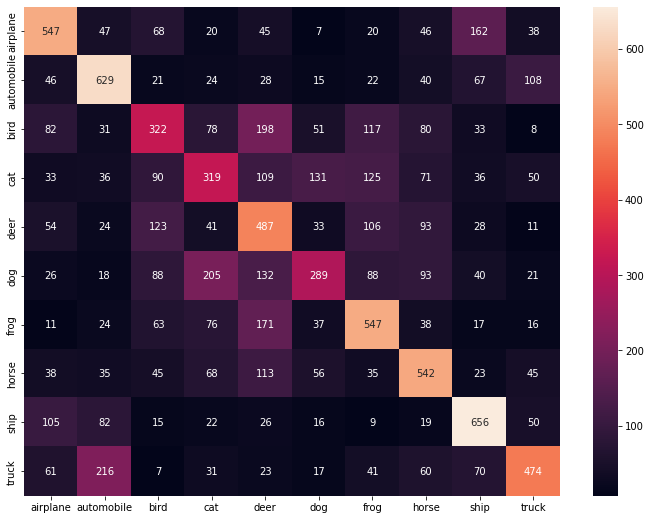

In [63]:
plt.figure(figsize=(12, 9))
c = sns.heatmap(confusion_mtx, annot=True, fmt='g');
c.set(xticklabels=class_names, yticklabels=class_names);

### Activation func = ReLU

In [41]:
model = Sequential()

model.add(Input(shape = (32, 32, 3)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))    # num_classes = 10

model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_15 (Flatten)        (None, 3072)              0         
                                                                 
 dense_45 (Dense)            (None, 128)               393344    
                                                                 
 dense_46 (Dense)            (None, 64)                8256      
                                                                 
 dense_47 (Dense)            (None, 10)                650       
                                                                 
Total params: 402,250
Trainable params: 402,250
Non-trainable params: 0
_________________________________________________________________


In [42]:
#Setting optmizer
optimizer = tensorflow.keras.optimizers.SGD(learning_rate=0.001)

#compiling the model
model.compile(optimizer= optimizer,
            loss='categorical_crossentropy', metrics=['acc'])

history = model.fit(train_images, train_labels, batch_size=32, epochs=50,
                    validation_data=(test_images, test_labels))

Epoch 1/50
1563/1563 [==============================] - 8s 5ms/step - loss: 2.0956 - acc: 0.2442 - val_loss: 1.9847 - val_acc: 0.3136
Epoch 2/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.9277 - acc: 0.3259 - val_loss: 1.8877 - val_acc: 0.3426
Epoch 3/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.8595 - acc: 0.3495 - val_loss: 1.8357 - val_acc: 0.3618
Epoch 4/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.8175 - acc: 0.3611 - val_loss: 1.8045 - val_acc: 0.3755
Epoch 5/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.7858 - acc: 0.3734 - val_loss: 1.7785 - val_acc: 0.3825
Epoch 6/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.7597 - acc: 0.3829 - val_loss: 1.7548 - val_acc: 0.3902
Epoch 7/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.7369 - acc: 0.3907 - val_loss: 1.7334 - val_acc: 0.3983
Epoch 8/50
1563/1563 [==============================] - 7s 5ms

#### Accuracy & score

In [64]:
loss , acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 1.4498 - acc: 0.4865


#### Confusion Matrix

In [65]:
label_pred = model.predict(test_images)
# Convert predictions classes to one hot vectors 
label_pred_classes = np.argmax(label_pred,axis = 1) 
# Convert validation observations to one hot vectors
label_true = np.argmax(test_labels,axis = 1)
# compute the confusion matrix
confusion_mtx = tf.math.confusion_matrix(label_true, label_pred_classes)

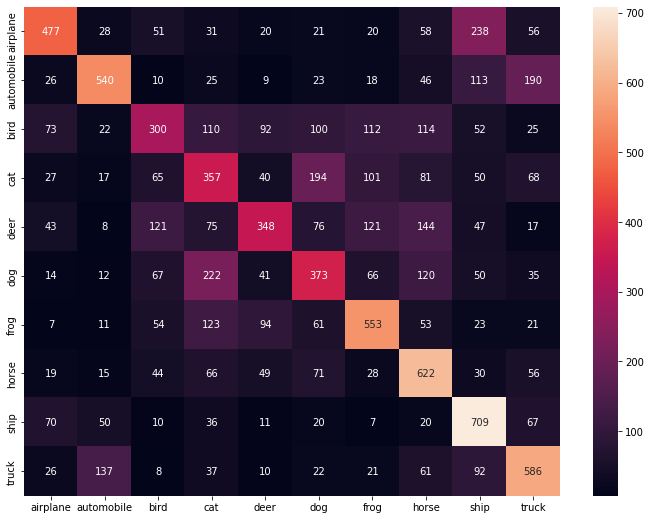

In [66]:
plt.figure(figsize=(12, 9))
c = sns.heatmap(confusion_mtx, annot=True, fmt='g');
c.set(xticklabels=class_names, yticklabels=class_names);

### Plots

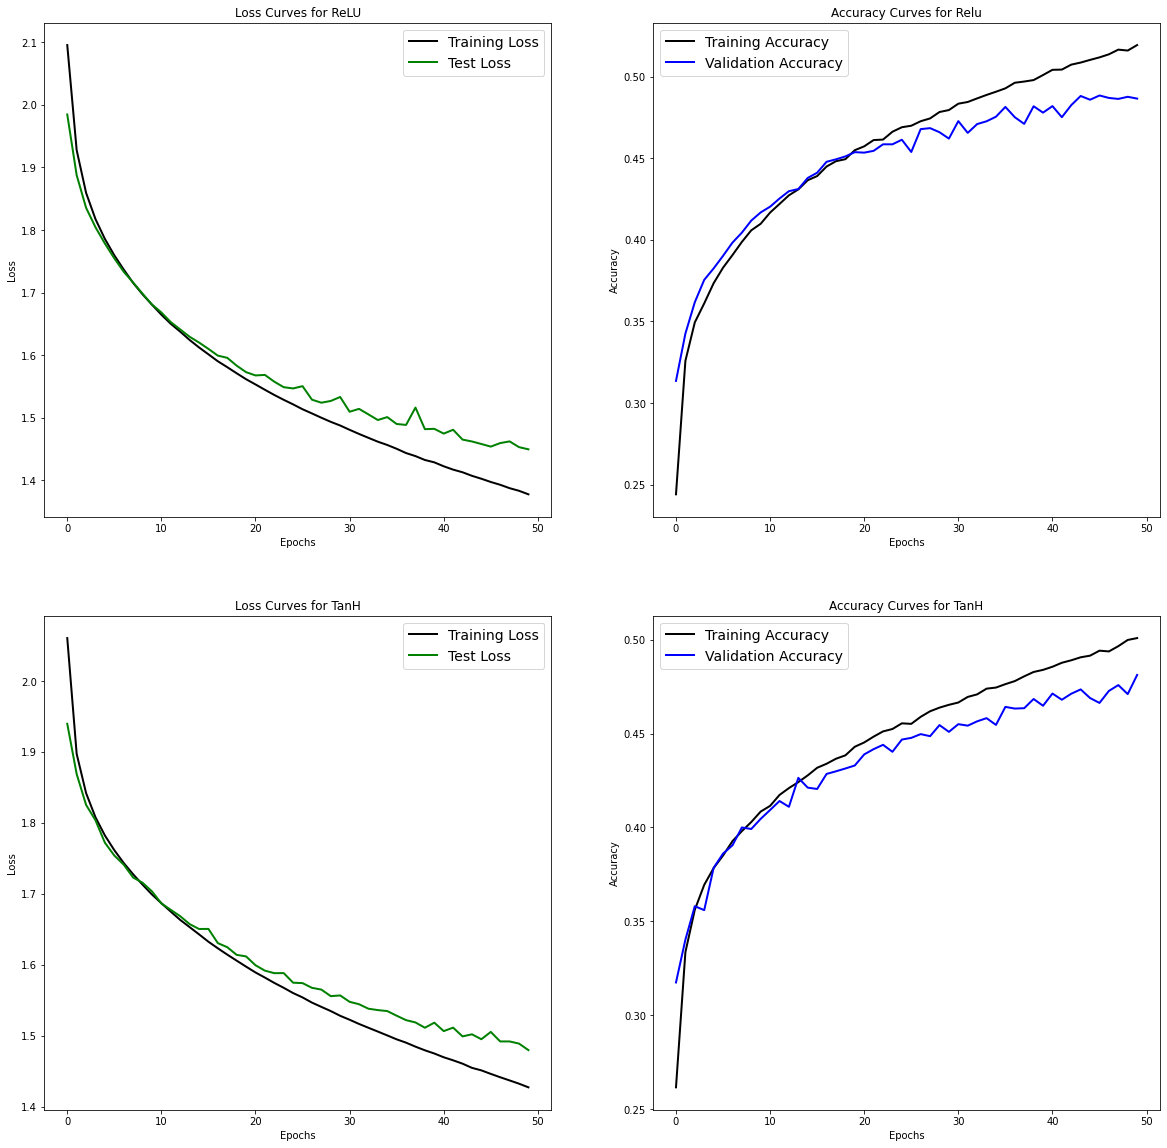

In [55]:
fig, ax = plt.subplots(nrows = 2, ncols = 2,figsize = (20, 20))
ax[0][0].plot(history.history['loss'], 'black', linewidth=2.0)
ax[0][0].plot(history.history['val_loss'], 'green', linewidth=2.0)
ax[0][0].legend(['Training Loss', 'Test Loss'], fontsize=14)
ax[0][0].set(xlabel= 'Epochs'
            , ylabel= 'Loss'
            , title= 'Loss Curves for ReLU');
ax[1][0].plot(history2.history['loss'], 'black', linewidth=2.0)
ax[1][0].plot(history2.history['val_loss'], 'green', linewidth=2.0)
ax[1][0].legend(['Training Loss', 'Test Loss'], fontsize=14)
ax[1][0].set(xlabel= 'Epochs'
            , ylabel= 'Loss'
            , title= 'Loss Curves for TanH');
ax[0][1].plot(history.history['acc'], 'black', linewidth=2.0)
ax[0][1].plot(history.history['val_acc'], 'blue', linewidth=2.0)
ax[0][1].legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
ax[0][1].set(xlabel='Epochs'
            , ylabel='Accuracy'
            , title= 'Accuracy Curves for Relu');
ax[1][1].plot(history2.history['acc'], 'black', linewidth=2.0)
ax[1][1].plot(history2.history['val_acc'], 'blue', linewidth=2.0)
ax[1][1].legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
ax[1][1].set(xlabel='Epochs'
            , ylabel='Accuracy'
            , title= 'Accuracy Curves for TanH');

## ج

### loss = Cross entropy

In [78]:
model = Sequential()

model.add(Input(shape = (32, 32, 3)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))    # num_classes = 10

model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_18 (Flatten)        (None, 3072)              0         
                                                                 
 dense_54 (Dense)            (None, 128)               393344    
                                                                 
 dense_55 (Dense)            (None, 64)                8256      
                                                                 
 dense_56 (Dense)            (None, 10)                650       
                                                                 
Total params: 402,250
Trainable params: 402,250
Non-trainable params: 0
_________________________________________________________________


In [79]:
#Setting optmizer
optimizer = tensorflow.keras.optimizers.SGD(learning_rate=0.001)

#compiling the model
model.compile(optimizer= optimizer,
            loss='categorical_crossentropy', metrics=['acc'])

history = model.fit(train_images, train_labels, batch_size=64, epochs=40,
                    validation_data=(test_images, test_labels))

Epoch 1/40
782/782 [==============================] - 5s 5ms/step - loss: 2.1925 - acc: 0.1906 - val_loss: 2.1170 - val_acc: 0.2335
Epoch 2/40
782/782 [==============================] - 4s 5ms/step - loss: 2.0734 - acc: 0.2479 - val_loss: 2.0316 - val_acc: 0.2644
Epoch 3/40
782/782 [==============================] - 4s 5ms/step - loss: 2.0034 - acc: 0.2832 - val_loss: 1.9727 - val_acc: 0.3052
Epoch 4/40
782/782 [==============================] - 4s 5ms/step - loss: 1.9537 - acc: 0.3127 - val_loss: 1.9341 - val_acc: 0.3095
Epoch 5/40
782/782 [==============================] - 4s 5ms/step - loss: 1.9154 - acc: 0.3293 - val_loss: 1.8991 - val_acc: 0.3336
Epoch 6/40
782/782 [==============================] - 4s 5ms/step - loss: 1.8849 - acc: 0.3406 - val_loss: 1.8694 - val_acc: 0.3445
Epoch 7/40
782/782 [==============================] - 4s 5ms/step - loss: 1.8601 - acc: 0.3514 - val_loss: 1.8463 - val_acc: 0.3534
Epoch 8/40
782/782 [==============================] - 4s 5ms/step - loss: 1.

#### Accuracy & error

In [80]:
loss, acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 1.5818 - acc: 0.4465


#### Confusion Matrix

In [81]:
label_pred = model.predict(test_images)
# Convert predictions classes to one hot vectors 
label_pred_classes = np.argmax(label_pred,axis = 1) 
# Convert validation observations to one hot vectors
label_true = np.argmax(test_labels,axis = 1)
# compute the confusion matrix
confusion_mtx = tf.math.confusion_matrix(label_true, label_pred_classes)

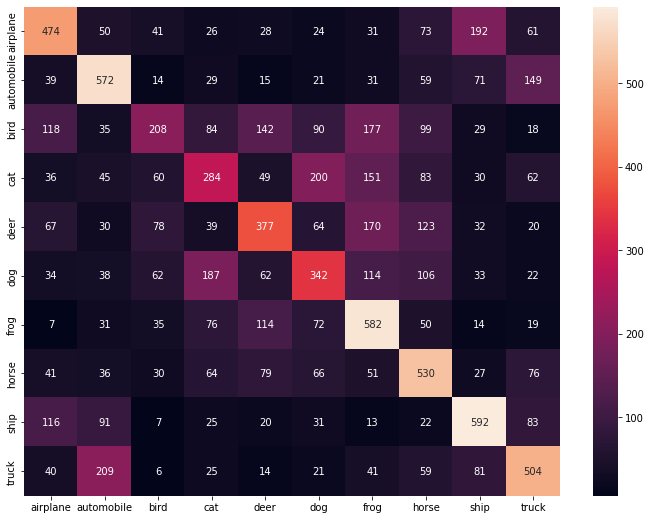

In [82]:
plt.figure(figsize=(12, 9))
c = sns.heatmap(confusion_mtx, annot=True, fmt='g');
c.set(xticklabels=class_names, yticklabels=class_names);

### loss = MSE

In [83]:
model2 = Sequential()

model2.add(Input(shape = (32, 32, 3)))
model2.add(layers.Flatten())
model2.add(layers.Dense(128, activation='relu'))
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(num_classes, activation='softmax'))    # num_classes = 10

model2.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_19 (Flatten)        (None, 3072)              0         
                                                                 
 dense_57 (Dense)            (None, 128)               393344    
                                                                 
 dense_58 (Dense)            (None, 64)                8256      
                                                                 
 dense_59 (Dense)            (None, 10)                650       
                                                                 
Total params: 402,250
Trainable params: 402,250
Non-trainable params: 0
_________________________________________________________________


In [84]:
#Setting optmizer
optimizer = tensorflow.keras.optimizers.SGD(learning_rate=0.001)

#compiling the model
model2.compile(optimizer= optimizer,
            loss='mse', metrics=['acc'])

history2 = model2.fit(train_images, train_labels, batch_size=64, epochs=40,
                    validation_data=(test_images, test_labels))

Epoch 1/40
782/782 [==============================] - 5s 5ms/step - loss: 0.0911 - acc: 0.0970 - val_loss: 0.0906 - val_acc: 0.1193
Epoch 2/40
782/782 [==============================] - 3s 4ms/step - loss: 0.0904 - acc: 0.1246 - val_loss: 0.0902 - val_acc: 0.1387
Epoch 3/40
782/782 [==============================] - 3s 4ms/step - loss: 0.0900 - acc: 0.1354 - val_loss: 0.0899 - val_acc: 0.1445
Epoch 4/40
782/782 [==============================] - 4s 5ms/step - loss: 0.0898 - acc: 0.1435 - val_loss: 0.0896 - val_acc: 0.1517
Epoch 5/40
782/782 [==============================] - 3s 4ms/step - loss: 0.0895 - acc: 0.1511 - val_loss: 0.0894 - val_acc: 0.1559
Epoch 6/40
782/782 [==============================] - 3s 4ms/step - loss: 0.0893 - acc: 0.1585 - val_loss: 0.0892 - val_acc: 0.1642
Epoch 7/40
782/782 [==============================] - 3s 4ms/step - loss: 0.0892 - acc: 0.1652 - val_loss: 0.0891 - val_acc: 0.1705
Epoch 8/40
782/782 [==============================] - 3s 4ms/step - loss: 0.

#### Accuracy & Error

In [85]:
loss2, acc2 = model2.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0853 - acc: 0.2504


#### Confusion Matrix

In [86]:
label_pred = model2.predict(test_images)
# Convert predictions classes to one hot vectors 
label_pred_classes = np.argmax(label_pred,axis = 1) 
# Convert validation observations to one hot vectors
label_true = np.argmax(test_labels,axis = 1)
# compute the confusion matrix
confusion_mtx = tf.math.confusion_matrix(label_true, label_pred_classes)

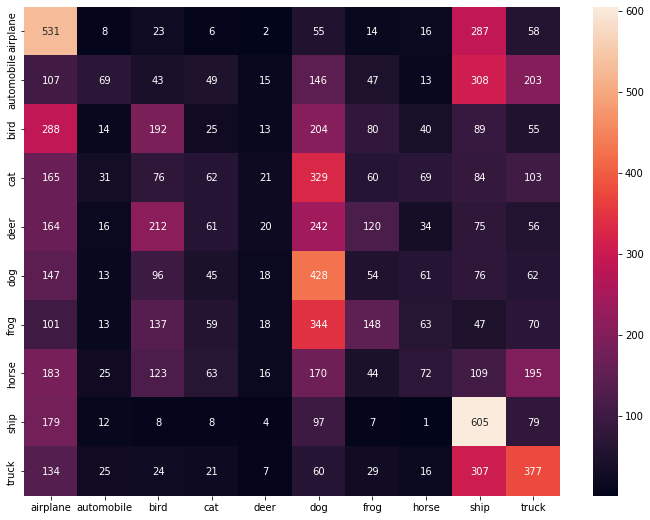

In [87]:
plt.figure(figsize=(12, 9))
c = sns.heatmap(confusion_mtx, annot=True, fmt='g');
c.set(xticklabels=class_names, yticklabels=class_names);

### Plots

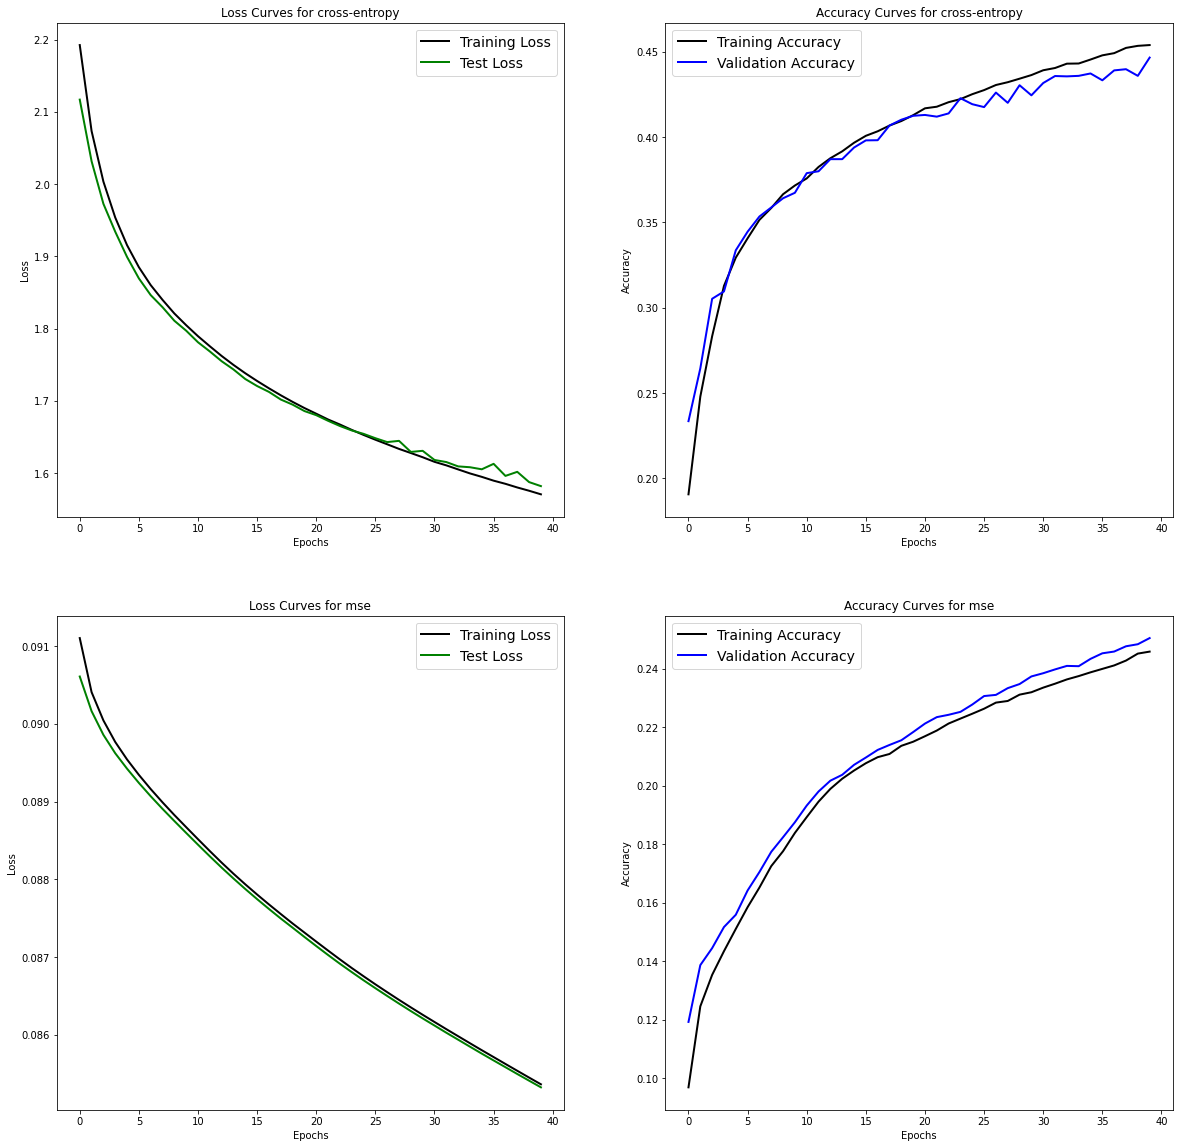

In [88]:
fig, ax = plt.subplots(nrows = 2, ncols = 2,figsize = (20, 20))
ax[0][0].plot(history.history['loss'], 'black', linewidth=2.0)
ax[0][0].plot(history.history['val_loss'], 'green', linewidth=2.0)
ax[0][0].legend(['Training Loss', 'Test Loss'], fontsize=14)
ax[0][0].set(xlabel= 'Epochs'
            , ylabel= 'Loss'
            , title= 'Loss Curves for cross-entropy');
ax[1][0].plot(history2.history['loss'], 'black', linewidth=2.0)
ax[1][0].plot(history2.history['val_loss'], 'green', linewidth=2.0)
ax[1][0].legend(['Training Loss', 'Test Loss'], fontsize=14)
ax[1][0].set(xlabel= 'Epochs'
            , ylabel= 'Loss'
            , title= 'Loss Curves for mse');
ax[0][1].plot(history.history['acc'], 'black', linewidth=2.0)
ax[0][1].plot(history.history['val_acc'], 'blue', linewidth=2.0)
ax[0][1].legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
ax[0][1].set(xlabel='Epochs'
            , ylabel='Accuracy'
            , title= 'Accuracy Curves for cross-entropy');
ax[1][1].plot(history2.history['acc'], 'black', linewidth=2.0)
ax[1][1].plot(history2.history['val_acc'], 'blue', linewidth=2.0)
ax[1][1].legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
ax[1][1].set(xlabel='Epochs'
            , ylabel='Accuracy'
            , title= 'Accuracy Curves for mse');

## د

### Normal Adam

In [5]:
model = Sequential()

model.add(Input(shape = (32, 32, 3)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))    # num_classes = 10

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 128)               393344    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 402,250
Trainable params: 402,250
Non-trainable params: 0
_________________________________________________________________


In [6]:
#Setting optmizer
optimizer = tensorflow.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

#compiling the model
model.compile(optimizer= optimizer,
            loss='categorical_crossentropy', metrics=['acc'])

history = model.fit(train_images, train_labels, batch_size=64, epochs=40,
                    validation_data=(test_images, test_labels))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/40
782/782 [==============================] - 6s 7ms/step - loss: 1.8875 - acc: 0.3200 - val_loss: 1.7442 - val_acc: 0.3799
Epoch 2/40
782/782 [==============================] - 5s 7ms/step - loss: 1.7138 - acc: 0.3892 - val_loss: 1.6367 - val_acc: 0.4198
Epoch 3/40
782/782 [==============================] - 5s 6ms/step - loss: 1.6257 - acc: 0.4212 - val_loss: 1.6238 - val_acc: 0.4212
Epoch 4/40
782/782 [==============================] - 5s 7ms/step - loss: 1.5740 - acc: 0.4379 - val_loss: 1.5721 - val_acc: 0.4381
Epoch 5/40
782/782 [==============================] - 5s 6ms/step - loss: 1.5383 - acc: 0.4512 - val_loss: 1.5478 - val_acc: 0.4507
Epoch 6/40
782/782 [==============================] - 5s 6ms/step - loss: 1.5083 - acc: 0.4621 - val_loss: 1.5325 - val_acc: 0.4548
Epoch 7/40
782/782 [==============================] - 5s 7ms/step - loss: 1.4914 - acc: 0.4703 - val_loss: 1.5271 - val_acc: 0.4502
Epoch 8/40
782/782 [==============================] - 5s 6ms/step - loss: 1.

#### precision, recall and f1-score


In [7]:
label_pred = model.predict(test_images)
# Convert predictions classes to one hot vectors 
label_pred_classes = np.argmax(label_pred,axis = 1) 
# Convert validation observations to one hot vectors
label_true = np.argmax(test_labels,axis = 1)
# compute the confusion matrix
metrics = classification_report(label_true, label_pred_classes)
print(metrics)

              precision    recall  f1-score   support

           0       0.62      0.49      0.54      1000
           1       0.66      0.57      0.61      1000
           2       0.40      0.37      0.38      1000
           3       0.35      0.24      0.28      1000
           4       0.40      0.48      0.44      1000
           5       0.41      0.44      0.42      1000
           6       0.50      0.61      0.55      1000
           7       0.56      0.54      0.55      1000
           8       0.52      0.70      0.60      1000
           9       0.57      0.53      0.55      1000

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.49     10000
weighted avg       0.50      0.50      0.49     10000



### Nadam (Adam with nestorv)

In [8]:
model2 = Sequential()

model2.add(Input(shape = (32, 32, 3)))
model2.add(layers.Flatten())
model2.add(layers.Dense(128, activation='relu'))
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(num_classes, activation='softmax'))    # num_classes = 10

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_3 (Dense)             (None, 128)               393344    
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 402,250
Trainable params: 402,250
Non-trainable params: 0
_________________________________________________________________


In [9]:
#Setting optmizer
optimizer = tensorflow.keras.optimizers.Nadam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)


#compiling the model
model2.compile(optimizer= optimizer,
            loss='categorical_crossentropy', metrics=['acc'])

history2 = model2.fit(train_images, train_labels, batch_size=64, epochs=40,
                    validation_data=(test_images, test_labels))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/nadam.py:73: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Nadam, self).__init__(name, **kwargs)


Epoch 1/40
782/782 [==============================] - 9s 11ms/step - loss: 1.8835 - acc: 0.3167 - val_loss: 2.2537 - val_acc: 0.2141
Epoch 2/40
782/782 [==============================] - 9s 11ms/step - loss: 1.6927 - acc: 0.3961 - val_loss: 1.6581 - val_acc: 0.4091
Epoch 3/40
782/782 [==============================] - 8s 10ms/step - loss: 1.6102 - acc: 0.4238 - val_loss: 1.6410 - val_acc: 0.4200
Epoch 4/40
782/782 [==============================] - 8s 11ms/step - loss: 1.5633 - acc: 0.4413 - val_loss: 1.5988 - val_acc: 0.4314
Epoch 5/40
782/782 [==============================] - 8s 10ms/step - loss: 1.5222 - acc: 0.4607 - val_loss: 1.5342 - val_acc: 0.4528
Epoch 6/40
782/782 [==============================] - 8s 11ms/step - loss: 1.4918 - acc: 0.4697 - val_loss: 1.6494 - val_acc: 0.4077
Epoch 7/40
782/782 [==============================] - 9s 11ms/step - loss: 1.4679 - acc: 0.4775 - val_loss: 1.6629 - val_acc: 0.4046
Epoch 8/40
782/782 [==============================] - 8s 11ms/step - 

#### precision, recall and f1-score

In [10]:
label_pred = model2.predict(test_images)
# Convert predictions classes to one hot vectors 
label_pred_classes = np.argmax(label_pred,axis = 1) 
# Convert validation observations to one hot vectors
label_true = np.argmax(test_labels,axis = 1)
# compute the confusion matrix
metrics = classification_report(label_true, label_pred_classes)
print(metrics)

              precision    recall  f1-score   support

           0       0.51      0.64      0.57      1000
           1       0.52      0.71      0.60      1000
           2       0.44      0.32      0.37      1000
           3       0.36      0.22      0.27      1000
           4       0.42      0.43      0.43      1000
           5       0.43      0.37      0.40      1000
           6       0.44      0.65      0.52      1000
           7       0.53      0.59      0.55      1000
           8       0.59      0.60      0.60      1000
           9       0.64      0.37      0.47      1000

    accuracy                           0.49     10000
   macro avg       0.49      0.49      0.48     10000
weighted avg       0.49      0.49      0.48     10000



### SGD with momentum

In [15]:
model3 = Sequential()

model3.add(Input(shape = (32, 32, 3)))
model3.add(layers.Flatten())
model3.add(layers.Dense(128, activation='relu'))
model3.add(layers.Dense(64, activation='relu'))
model3.add(layers.Dense(num_classes, activation='softmax'))    # num_classes = 10

model3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 3072)              0         
                                                                 
 dense_12 (Dense)            (None, 128)               393344    
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dense_14 (Dense)            (None, 10)                650       
                                                                 
Total params: 402,250
Trainable params: 402,250
Non-trainable params: 0
_________________________________________________________________


In [16]:
#Setting optmizer
optimizer = tensorflow.keras.optimizers.SGD(lr=0.001, momentum=0.8, nesterov=True)

#compiling the model
model3.compile(optimizer= optimizer,
            loss='categorical_crossentropy', metrics=['acc'])

history3 = model3.fit(train_images, train_labels, batch_size=64, epochs=40,
                    validation_data=(test_images, test_labels))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/40
782/782 [==============================] - 6s 7ms/step - loss: 2.0573 - acc: 0.2614 - val_loss: 1.9103 - val_acc: 0.3250
Epoch 2/40
782/782 [==============================] - 5s 6ms/step - loss: 1.8538 - acc: 0.3469 - val_loss: 1.8175 - val_acc: 0.3555
Epoch 3/40
782/782 [==============================] - 5s 6ms/step - loss: 1.7704 - acc: 0.3754 - val_loss: 1.7400 - val_acc: 0.3932
Epoch 4/40
782/782 [==============================] - 5s 6ms/step - loss: 1.7131 - acc: 0.3981 - val_loss: 1.7089 - val_acc: 0.3897
Epoch 5/40
782/782 [==============================] - 5s 6ms/step - loss: 1.6720 - acc: 0.4118 - val_loss: 1.6625 - val_acc: 0.4169
Epoch 6/40
782/782 [==============================] - 5s 6ms/step - loss: 1.6367 - acc: 0.4246 - val_loss: 1.6453 - val_acc: 0.4171
Epoch 7/40
782/782 [==============================] - 5s 6ms/step - loss: 1.6083 - acc: 0.4369 - val_loss: 1.6088 - val_acc: 0.4342
Epoch 8/40
782/782 [==============================] - 5s 6ms/step - loss: 1.

#### precision, recall and f1-score


In [17]:
label_pred = model3.predict(test_images)
# Convert predictions classes to one hot vectors 
label_pred_classes = np.argmax(label_pred,axis = 1) 
# Convert validation observations to one hot vectors
label_true = np.argmax(test_labels,axis = 1)
# compute the confusion matrix
metrics = classification_report(label_true, label_pred_classes)
print(metrics)

              precision    recall  f1-score   support

           0       0.66      0.42      0.51      1000
           1       0.69      0.56      0.62      1000
           2       0.38      0.32      0.35      1000
           3       0.36      0.31      0.33      1000
           4       0.31      0.64      0.42      1000
           5       0.51      0.26      0.35      1000
           6       0.54      0.53      0.54      1000
           7       0.53      0.59      0.56      1000
           8       0.52      0.73      0.60      1000
           9       0.64      0.48      0.55      1000

    accuracy                           0.49     10000
   macro avg       0.51      0.49      0.48     10000
weighted avg       0.51      0.49      0.48     10000



### plots


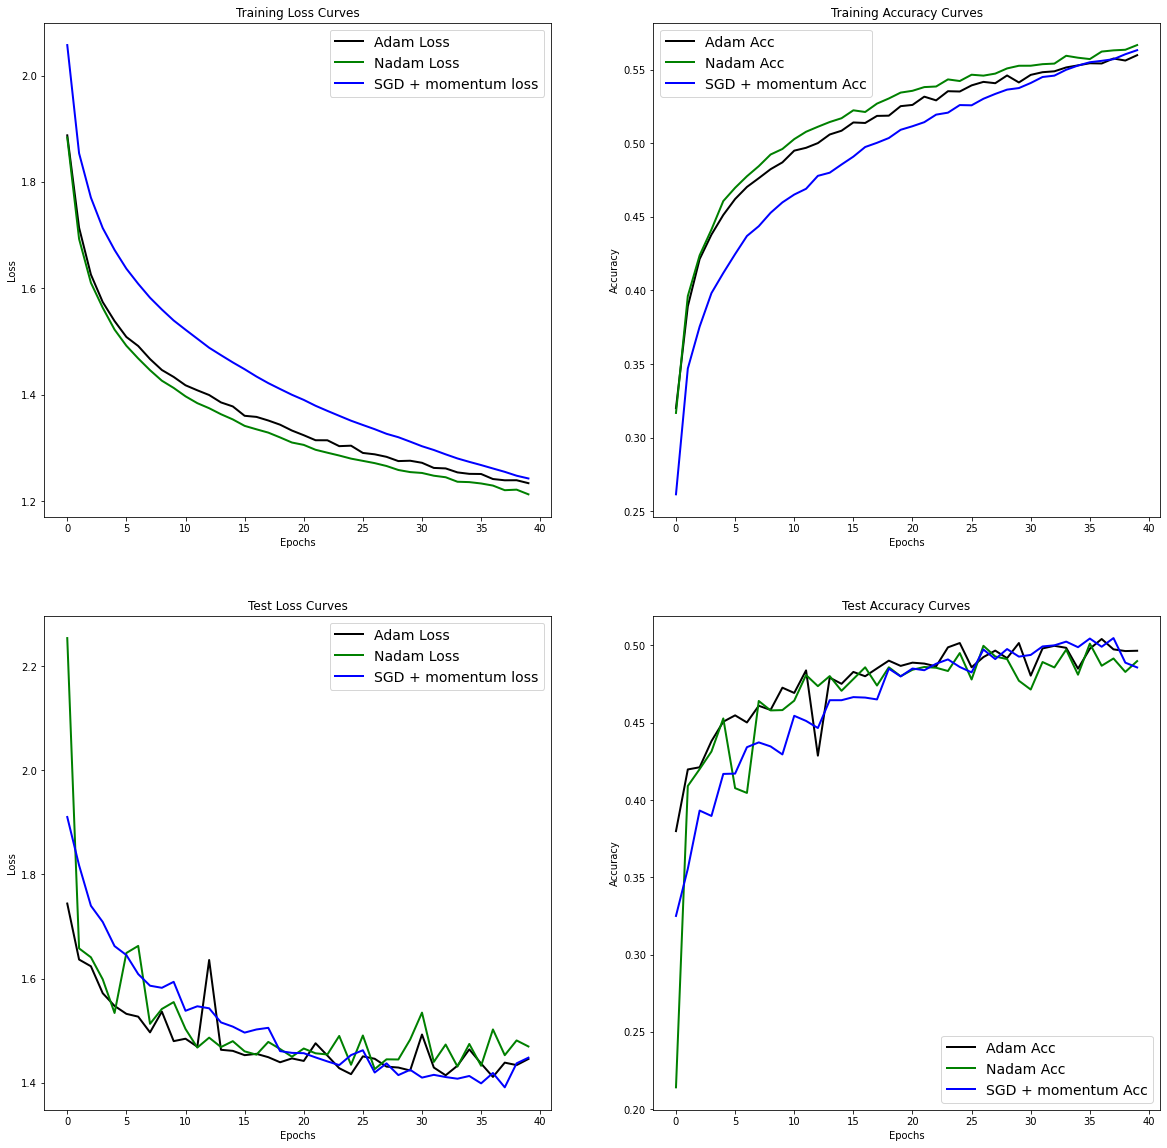

In [18]:
fig, ax = plt.subplots(nrows = 2, ncols = 2,figsize = (20, 20))
ax[0][0].plot(history.history['loss'], 'black', linewidth=2.0)
ax[0][0].plot(history2.history['loss'], 'green', linewidth=2.0)
ax[0][0].plot(history3.history['loss'], 'blue', linewidth=2.0)
ax[0][0].legend(['Adam Loss', 'Nadam Loss', 'SGD + momentum loss'], fontsize=14)
ax[0][0].set(xlabel= 'Epochs'
            , ylabel= 'Loss'
            , title= 'Training Loss Curves');
ax[1][0].plot(history.history['val_loss'], 'black', linewidth=2.0)
ax[1][0].plot(history2.history['val_loss'], 'green', linewidth=2.0)
ax[1][0].plot(history3.history['val_loss'], 'blue', linewidth=2.0)
ax[1][0].legend(['Adam Loss', 'Nadam Loss', 'SGD + momentum loss'], fontsize=14)
ax[1][0].set(xlabel= 'Epochs'
            , ylabel= 'Loss'
            , title= 'Test Loss Curves');
ax[0][1].plot(history.history['acc'], 'black', linewidth=2.0)
ax[0][1].plot(history2.history['acc'], 'green', linewidth=2.0)
ax[0][1].plot(history3.history['acc'], 'blue', linewidth=2.0)
ax[0][1].legend(['Adam Acc', 'Nadam Acc', 'SGD + momentum Acc'], fontsize=14)
ax[0][1].set(xlabel='Epochs'
            , ylabel='Accuracy'
            , title= 'Training Accuracy Curves');
ax[1][1].plot(history.history['val_acc'], 'black', linewidth=2.0)
ax[1][1].plot(history2.history['val_acc'], 'green', linewidth=2.0)
ax[1][1].plot(history3.history['val_acc'], 'blue', linewidth=2.0)
ax[1][1].legend(['Adam Acc', 'Nadam Acc', 'SGD + momentum Acc'], fontsize=14)
ax[1][1].set(xlabel='Epochs'
            , ylabel='Accuracy'
            , title= 'Test Accuracy Curves');

## ز

### unbalancing data

In [77]:
airplane_index = np.where(y_train==0)[0]
bird_index = np.where(y_train==2)[0]
airplane_index_delete = np.random.choice(airplane_index, size = 2500, replace=False)
bird_index_delete = np.random.choice(bird_index, size = 2500, replace = False)
train_images_new = np.delete(train_images, [airplane_index_delete, bird_index_delete], axis=0)
y_train_new = np.delete(y_train, [airplane_index_delete, bird_index_delete], axis=0)
train_labels_new  = np_utils.to_categorical(y_train_new, num_classes)

In [97]:
class_weights = class_weight.compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(y_train_new.reshape(1, -1)[0]),
                                        y = y_train_new.reshape(1, -1)[0]                                                    
                                    )
class_weights = dict(zip(np.unique(y_train_new.reshape(1, -1)[0]), class_weights))

In [79]:
# unbalanced dataset
Counter(y_train_new.reshape(1, -1)[0])

Counter({0: 2500,
         1: 5000,
         2: 2500,
         3: 5000,
         4: 5000,
         5: 5000,
         6: 5000,
         7: 5000,
         8: 5000,
         9: 5000})

### training data on unbalanced dataset

In [83]:
model = Sequential()

model.add(Input(shape = (32, 32, 3)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))    # num_classes = 10

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 3072)              0         
                                                                 
 dense_6 (Dense)             (None, 128)               393344    
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 10)                650       
                                                                 
Total params: 402,250
Trainable params: 402,250
Non-trainable params: 0
_________________________________________________________________


In [84]:
#Setting optmizer
optimizer = tensorflow.keras.optimizers.Nadam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)


#compiling the model
model.compile(optimizer= optimizer,
            loss='categorical_crossentropy', metrics=['acc'])

history = model.fit(train_images_new, train_labels_new, batch_size=64, epochs=40,
                    validation_data=(test_images, test_labels))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/nadam.py:73: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Nadam, self).__init__(name, **kwargs)


Epoch 1/40
704/704 [==============================] - 9s 12ms/step - loss: 1.8694 - acc: 0.3252 - val_loss: 2.2263 - val_acc: 0.2596
Epoch 2/40
704/704 [==============================] - 8s 12ms/step - loss: 1.6661 - acc: 0.4084 - val_loss: 1.8491 - val_acc: 0.3353
Epoch 3/40
704/704 [==============================] - 8s 12ms/step - loss: 1.5851 - acc: 0.4414 - val_loss: 1.6763 - val_acc: 0.4128
Epoch 4/40
704/704 [==============================] - 8s 12ms/step - loss: 1.5307 - acc: 0.4613 - val_loss: 1.6998 - val_acc: 0.3891
Epoch 5/40
704/704 [==============================] - 8s 12ms/step - loss: 1.4952 - acc: 0.4726 - val_loss: 1.9157 - val_acc: 0.3345
Epoch 6/40
704/704 [==============================] - 8s 12ms/step - loss: 1.4603 - acc: 0.4843 - val_loss: 1.5630 - val_acc: 0.4476
Epoch 7/40
704/704 [==============================] - 8s 12ms/step - loss: 1.4339 - acc: 0.4923 - val_loss: 1.5950 - val_acc: 0.4308
Epoch 8/40
704/704 [==============================] - 8s 12ms/step - 

#### confusion matrix

In [85]:
label_pred = model.predict(test_images)
# Convert predictions classes to one hot vectors 
label_pred_classes = np.argmax(label_pred,axis = 1) 
# Convert validation observations to one hot vectors
label_true = np.argmax(test_labels,axis = 1)
# compute the confusion matrix
confusion_mtx = tf.math.confusion_matrix(label_true, label_pred_classes)

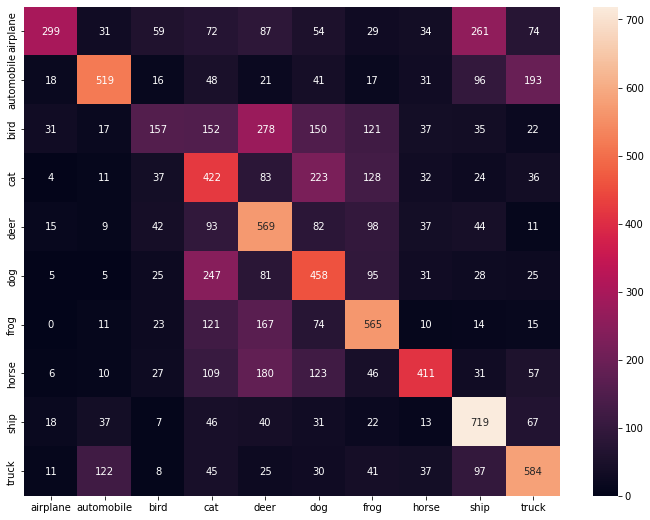

In [88]:
plt.figure(figsize=(12, 9))
c = sns.heatmap(confusion_mtx, annot=True, fmt='g');
c.set(xticklabels=class_names, yticklabels=class_names);

### training data on fixed dataset

In [89]:
model = Sequential()

model.add(Input(shape = (32, 32, 3)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))    # num_classes = 10

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 3072)              0         
                                                                 
 dense_9 (Dense)             (None, 128)               393344    
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dense_11 (Dense)            (None, 10)                650       
                                                                 
Total params: 402,250
Trainable params: 402,250
Non-trainable params: 0
_________________________________________________________________


In [99]:
#Setting optmizer
optimizer = tensorflow.keras.optimizers.Nadam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)


#compiling the model
model.compile(optimizer= optimizer,
            loss='categorical_crossentropy', metrics=['acc'])

history = model.fit(train_images_new, train_labels_new, batch_size=64, epochs=40,
                    validation_data=(test_images, test_labels), class_weight = class_weights)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/nadam.py:73: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Nadam, self).__init__(name, **kwargs)


Epoch 1/40
704/704 [==============================] - 11s 15ms/step - loss: 1.9084 - acc: 0.3171 - val_loss: 2.3394 - val_acc: 0.1993
Epoch 2/40
704/704 [==============================] - 9s 12ms/step - loss: 1.7165 - acc: 0.3923 - val_loss: 1.8408 - val_acc: 0.3599
Epoch 3/40
704/704 [==============================] - 8s 12ms/step - loss: 1.6410 - acc: 0.4204 - val_loss: 2.0957 - val_acc: 0.3013
Epoch 4/40
704/704 [==============================] - 8s 12ms/step - loss: 1.5849 - acc: 0.4431 - val_loss: 2.4389 - val_acc: 0.2493
Epoch 5/40
704/704 [==============================] - 8s 12ms/step - loss: 1.5458 - acc: 0.4563 - val_loss: 1.6266 - val_acc: 0.4200
Epoch 6/40
704/704 [==============================] - 9s 12ms/step - loss: 1.5141 - acc: 0.4682 - val_loss: 1.8582 - val_acc: 0.3754
Epoch 7/40
704/704 [==============================] - 8s 12ms/step - loss: 1.4929 - acc: 0.4762 - val_loss: 1.5407 - val_acc: 0.4445
Epoch 8/40
704/704 [==============================] - 8s 11ms/step -

#### confusion matrix

In [100]:
label_pred = model.predict(test_images)
# Convert predictions classes to one hot vectors 
label_pred_classes = np.argmax(label_pred,axis = 1) 
# Convert validation observations to one hot vectors
label_true = np.argmax(test_labels,axis = 1)
# compute the confusion matrix
confusion_mtx = tf.math.confusion_matrix(label_true, label_pred_classes)

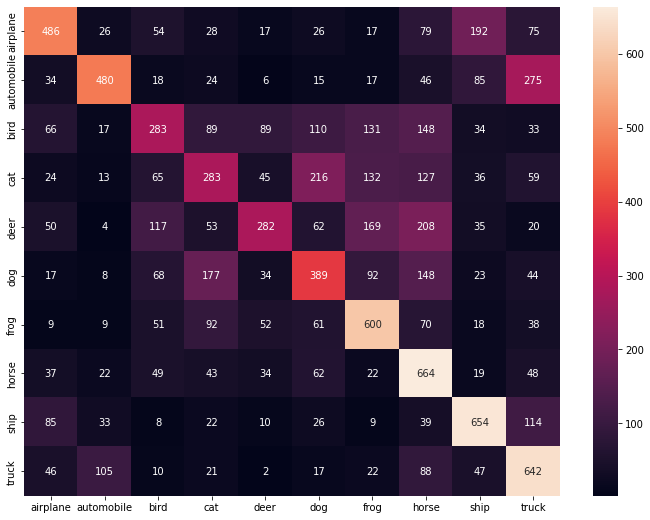

In [101]:
plt.figure(figsize=(12, 9))
c = sns.heatmap(confusion_mtx, annot=True, fmt='g');
c.set(xticklabels=class_names, yticklabels=class_names);

#Using CNN

## الف

In [24]:
from keras import regularizers

weight_decay = 1e-4
model2 = Sequential()
model2.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=(32, 32, 3)))
model2.add(Activation('elu'))
model2.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model2.add(Activation('elu'))
model2.add(Conv2D(32,kernel_size=(1, 1),strides = 2,kernel_regularizer=regularizers.l2(weight_decay), padding="same"))

 
model2.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model2.add(Activation('elu'))
model2.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model2.add(Activation('elu'))
model2.add(Conv2D(64,kernel_size=(1, 1),strides = 2,kernel_regularizer=regularizers.l2(weight_decay), padding="same"))

 
model2.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model2.add(Activation('elu'))
model2.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model2.add(Activation('elu'))
model2.add(Conv2D(128,kernel_size=(1, 1),strides = 2,kernel_regularizer=regularizers.l2(weight_decay), padding="same"))

 
model2.add(layers.Flatten())
model2.add(layers.Dense(128, activation='relu'))
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(num_classes, activation='softmax'))
 
model2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_38 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 activation_32 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_39 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 activation_33 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_40 (Conv2D)          (None, 16, 16, 32)        1056      
                                                                 
 conv2d_41 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 activation_34 (Activation)  (None, 16, 16, 64)       

In [25]:
#Setting optmizer
optimizer = tensorflow.keras.optimizers.Adam()

#compiling the model
model2.compile(optimizer= optimizer,
            loss='categorical_crossentropy', metrics=['acc'])

history = model2.fit(train_images, train_labels, batch_size=64, epochs=40,
                    validation_data=(test_images, test_labels))

Epoch 1/40
782/782 [==============================] - 25s 31ms/step - loss: 1.7485 - acc: 0.3943 - val_loss: 1.6022 - val_acc: 0.4411
Epoch 2/40
782/782 [==============================] - 24s 30ms/step - loss: 1.4654 - acc: 0.4952 - val_loss: 1.4085 - val_acc: 0.5138
Epoch 3/40
782/782 [==============================] - 24s 30ms/step - loss: 1.3267 - acc: 0.5481 - val_loss: 1.3253 - val_acc: 0.5409
Epoch 4/40
782/782 [==============================] - 24s 30ms/step - loss: 1.2162 - acc: 0.5868 - val_loss: 1.2902 - val_acc: 0.5612
Epoch 5/40
782/782 [==============================] - 24s 30ms/step - loss: 1.1260 - acc: 0.6205 - val_loss: 1.2277 - val_acc: 0.5931
Epoch 6/40
782/782 [==============================] - 23s 30ms/step - loss: 1.0453 - acc: 0.6505 - val_loss: 1.2024 - val_acc: 0.6084
Epoch 7/40
782/782 [==============================] - 24s 30ms/step - loss: 0.9666 - acc: 0.6825 - val_loss: 1.2047 - val_acc: 0.6061
Epoch 8/40
782/782 [==============================] - 25s 32ms

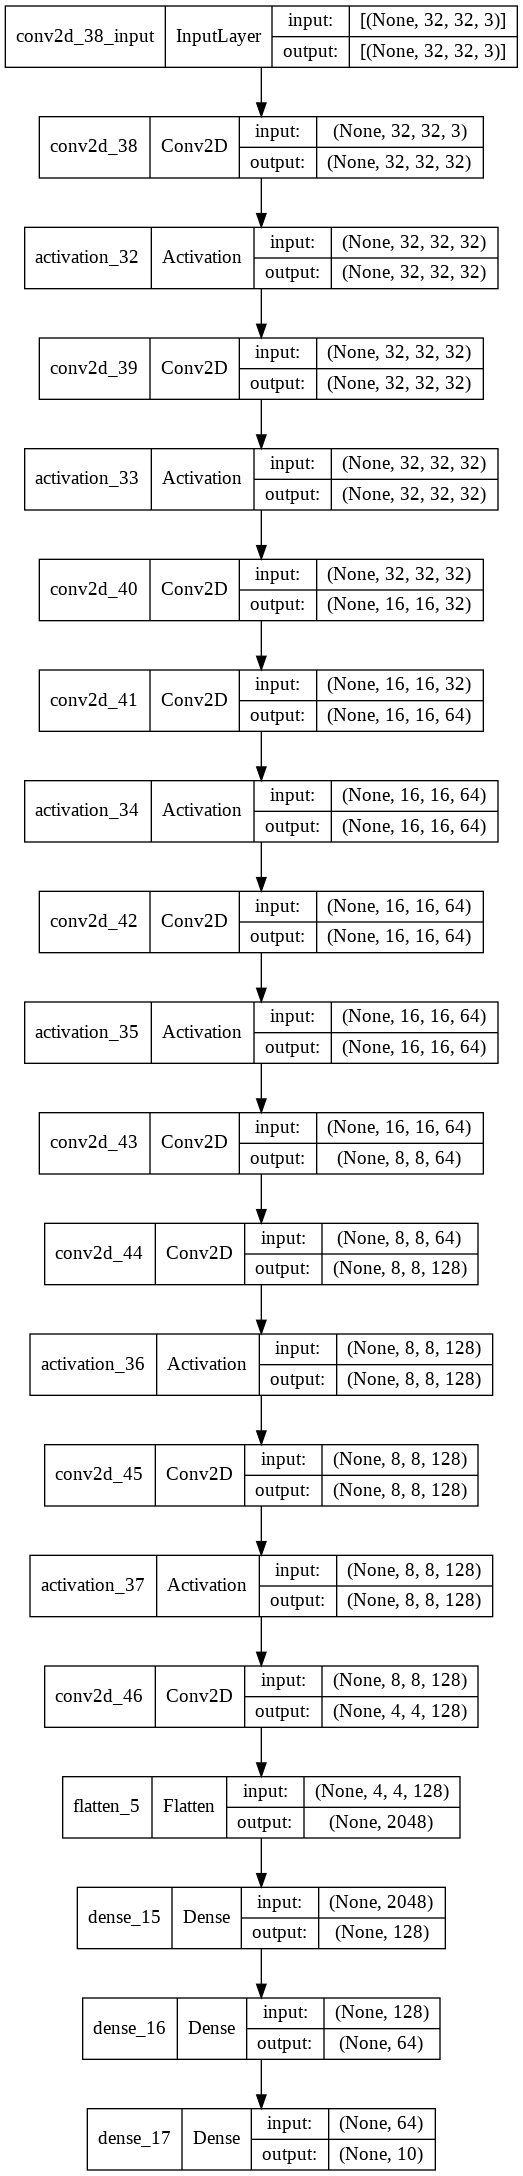

In [26]:
from tensorflow.keras.utils import plot_model
plot_model(model2, show_shapes=True, show_layer_names=True, to_file='model2.png')
from IPython.display import Image
Image(retina=True, filename='model2.png')

## ب

In [21]:
weight_decay = 1e-4
model2 = Sequential()
model2.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=(32, 32, 3)))
model2.add(Activation('relu'))
model2.add(BatchNormalization())
model2.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model2.add(Activation('relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))
 
model2.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model2.add(Activation('relu'))
model2.add(BatchNormalization())
model2.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model2.add(Activation('relu')) 
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))
 
model2.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model2.add(Activation('relu'))
model2.add(BatchNormalization())
model2.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model2.add(Activation('relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))
 
model2.add(layers.Flatten())
model2.add(layers.Dense(128, activation='relu'))
model2.add(BatchNormalization())
model2.add(layers.Dense(64, activation='relu'))
model2.add(BatchNormalization())
model2.add(layers.Dense(num_classes, activation='softmax'))
 
model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 activation_26 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_16 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_33 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 activation_27 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_17 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                     

In [22]:
#Setting optmizer
optimizer = tensorflow.keras.optimizers.Adam()

#compiling the model
model2.compile(optimizer= optimizer,
            loss='categorical_crossentropy', metrics=['acc'])

history2 = model2.fit(train_images, train_labels, batch_size=64, epochs=40,
                    validation_data=(test_images, test_labels))

Epoch 1/40
782/782 [==============================] - 21s 25ms/step - loss: 1.2586 - acc: 0.5678 - val_loss: 1.0659 - val_acc: 0.6496
Epoch 2/40
782/782 [==============================] - 19s 25ms/step - loss: 0.8188 - acc: 0.7308 - val_loss: 0.8400 - val_acc: 0.7215
Epoch 3/40
782/782 [==============================] - 19s 25ms/step - loss: 0.6673 - acc: 0.7864 - val_loss: 0.9220 - val_acc: 0.7094
Epoch 4/40
782/782 [==============================] - 19s 25ms/step - loss: 0.5653 - acc: 0.8258 - val_loss: 0.8015 - val_acc: 0.7573
Epoch 5/40
782/782 [==============================] - 20s 25ms/step - loss: 0.4904 - acc: 0.8562 - val_loss: 0.6952 - val_acc: 0.7964
Epoch 6/40
782/782 [==============================] - 19s 25ms/step - loss: 0.4306 - acc: 0.8804 - val_loss: 0.8127 - val_acc: 0.7745
Epoch 7/40
782/782 [==============================] - 20s 25ms/step - loss: 0.3845 - acc: 0.9012 - val_loss: 0.7981 - val_acc: 0.7857
Epoch 8/40
782/782 [==============================] - 19s 25ms

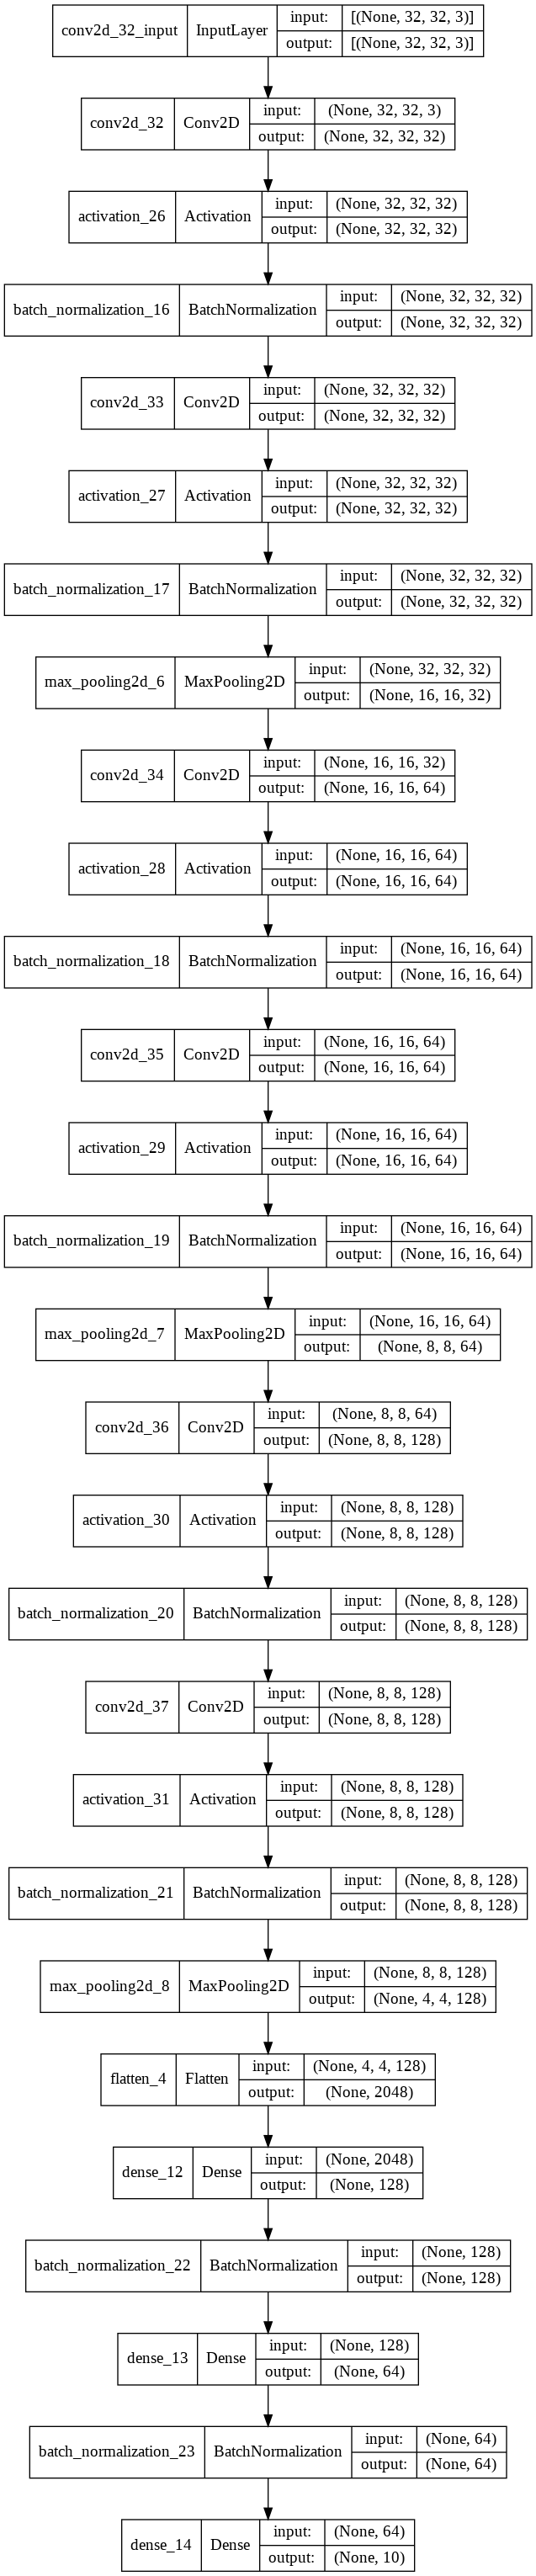

In [23]:
from tensorflow.keras.utils import plot_model
plot_model(model2, show_shapes=True, show_layer_names=True, to_file='model1.png')
from IPython.display import Image
Image(retina=True, filename='model1.png')

## ج

In [18]:
weight_decay = 1e-4
model2 = Sequential()
model2.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=(32, 32, 3)))
model2.add(Activation('relu'))
model2.add(BatchNormalization())
model2.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model2.add(Activation('relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.2))

 
model2.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model2.add(Activation('relu'))
model2.add(BatchNormalization())
model2.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model2.add(Activation('relu')) 
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.3))

 
model2.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model2.add(Activation('relu'))
model2.add(BatchNormalization())
model2.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model2.add(Activation('relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.4))

 
model2.add(layers.Flatten())
model2.add(layers.Dense(128, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))
model2.add(layers.Dense(64, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))
model2.add(layers.Dense(num_classes, activation='softmax'))
 
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 activation_20 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_8 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_27 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 activation_21 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_9 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                      

In [19]:
 #Setting optmizer
optimizer = tensorflow.keras.optimizers.Adam()

#compiling the model
model2.compile(optimizer= optimizer,
            loss='categorical_crossentropy', metrics=['acc'])

history3 = model2.fit(train_images, train_labels, batch_size=64, epochs=40,
                    validation_data=(test_images, test_labels))

Epoch 1/40
782/782 [==============================] - 73s 27ms/step - loss: 1.9127 - acc: 0.3523 - val_loss: 1.4511 - val_acc: 0.4826
Epoch 2/40
782/782 [==============================] - 20s 26ms/step - loss: 1.3256 - acc: 0.5455 - val_loss: 1.2285 - val_acc: 0.5715
Epoch 3/40
782/782 [==============================] - 20s 26ms/step - loss: 1.1333 - acc: 0.6271 - val_loss: 0.9742 - val_acc: 0.6670
Epoch 4/40
782/782 [==============================] - 20s 26ms/step - loss: 1.0070 - acc: 0.6735 - val_loss: 0.9544 - val_acc: 0.6822
Epoch 5/40
782/782 [==============================] - 20s 26ms/step - loss: 0.9241 - acc: 0.7071 - val_loss: 0.8437 - val_acc: 0.7328
Epoch 6/40
782/782 [==============================] - 20s 26ms/step - loss: 0.8659 - acc: 0.7336 - val_loss: 0.7540 - val_acc: 0.7639
Epoch 7/40
782/782 [==============================] - 20s 26ms/step - loss: 0.8136 - acc: 0.7549 - val_loss: 0.7911 - val_acc: 0.7544
Epoch 8/40
782/782 [==============================] - 20s 26ms

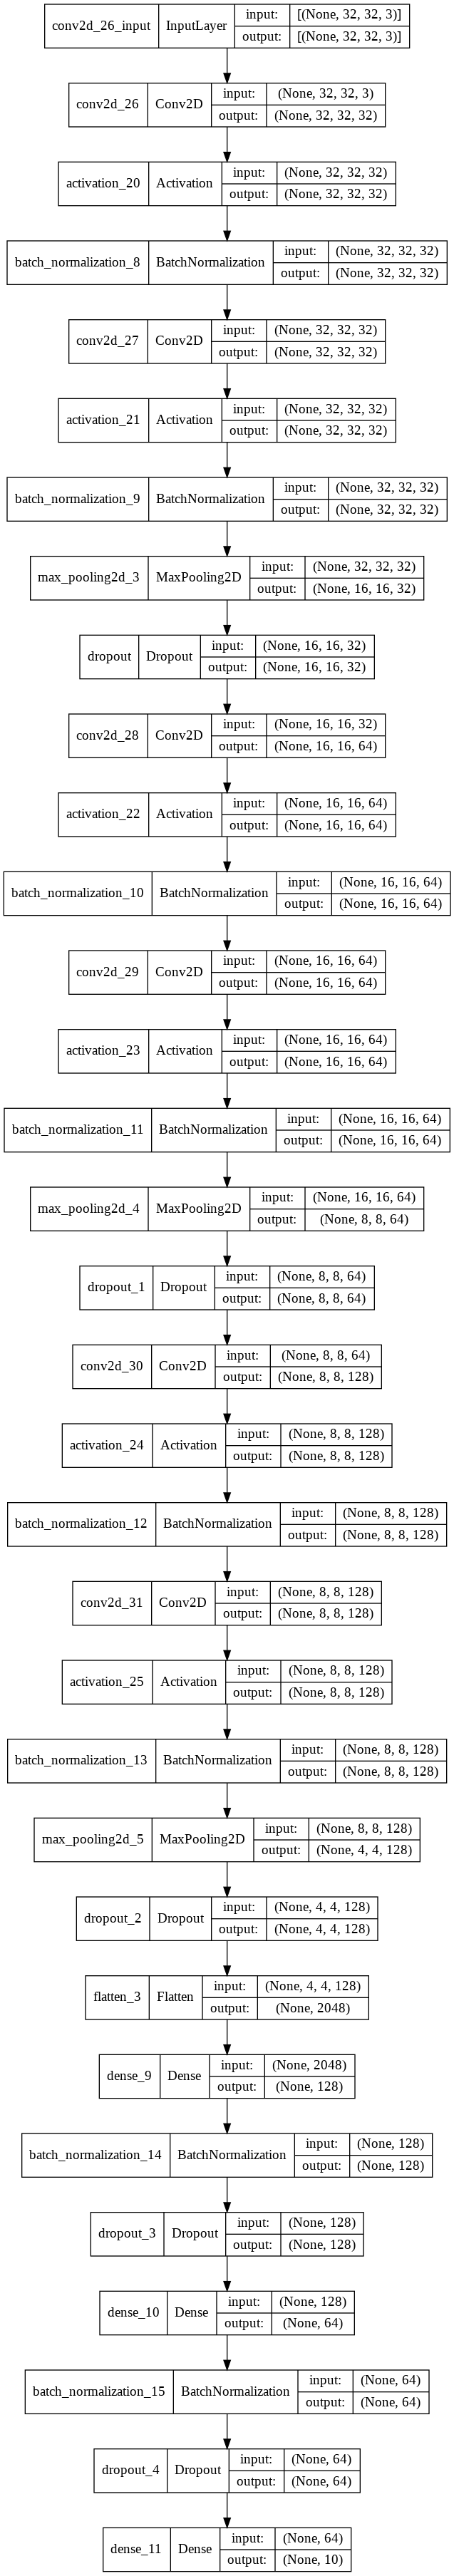

In [20]:
from tensorflow.keras.utils import plot_model
plot_model(model2, show_shapes=True, show_layer_names=True, to_file='model3.png')
from IPython.display import Image
Image(retina=True, filename='model3.png')

## Plots

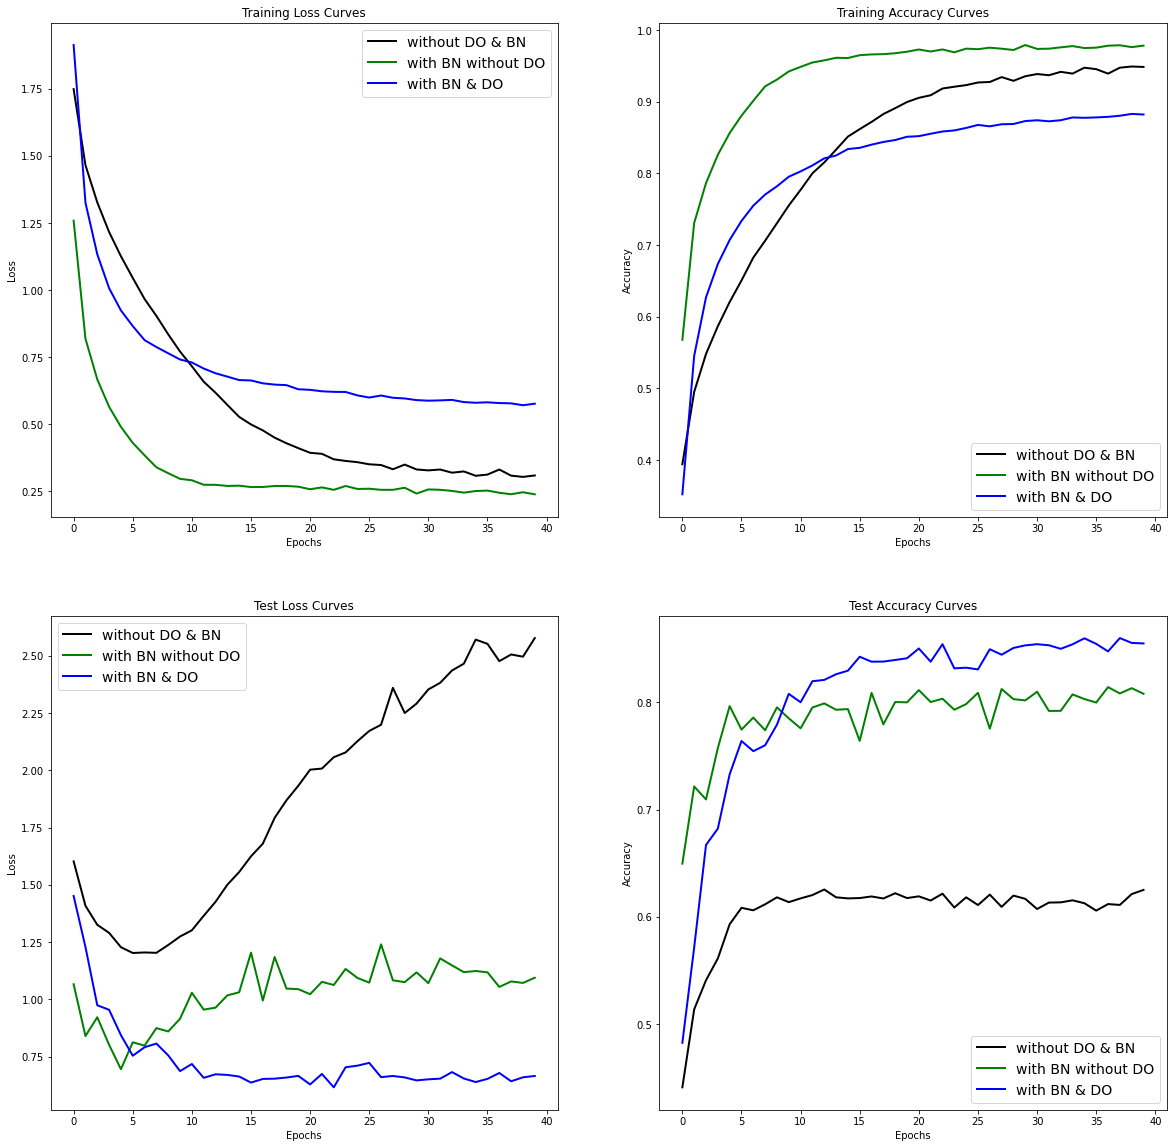

In [28]:
fig, ax = plt.subplots(nrows = 2, ncols = 2,figsize = (20, 20))
ax[0][0].plot(history.history['loss'], 'black', linewidth=2.0)
ax[0][0].plot(history2.history['loss'], 'green', linewidth=2.0)
ax[0][0].plot(history3.history['loss'], 'blue', linewidth=2.0)
ax[0][0].legend(['without DO & BN', 'with BN without DO', 'with BN & DO'], fontsize=14)
ax[0][0].set(xlabel= 'Epochs'
            , ylabel= 'Loss'
            , title= 'Training Loss Curves');
ax[1][0].plot(history.history['val_loss'], 'black', linewidth=2.0)
ax[1][0].plot(history2.history['val_loss'], 'green', linewidth=2.0)
ax[1][0].plot(history3.history['val_loss'], 'blue', linewidth=2.0)
ax[1][0].legend(['without DO & BN', 'with BN without DO', 'with BN & DO'], fontsize=14)
ax[1][0].set(xlabel= 'Epochs'
            , ylabel= 'Loss'
            , title= 'Test Loss Curves');
ax[0][1].plot(history.history['acc'], 'black', linewidth=2.0)
ax[0][1].plot(history2.history['acc'], 'green', linewidth=2.0)
ax[0][1].plot(history3.history['acc'], 'blue', linewidth=2.0)
ax[0][1].legend(['without DO & BN', 'with BN without DO', 'with BN & DO'], fontsize=14)
ax[0][1].set(xlabel='Epochs'
            , ylabel='Accuracy'
            , title= 'Training Accuracy Curves');
ax[1][1].plot(history.history['val_acc'], 'black', linewidth=2.0)
ax[1][1].plot(history2.history['val_acc'], 'green', linewidth=2.0)
ax[1][1].plot(history3.history['val_acc'], 'blue', linewidth=2.0)
ax[1][1].legend(['without DO & BN', 'with BN without DO', 'with BN & DO'], fontsize=14)
ax[1][1].set(xlabel='Epochs'
            , ylabel='Accuracy'
            , title= 'Test Accuracy Curves');

#Best general model


In [5]:
def lr_schedule(epoch):
    lrate = 0.001
    if epoch > 75:
        lrate = 0.0005
    if epoch > 100:
        lrate = 0.0003
    return lrate

In [8]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler
from keras import regularizers

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )
datagen.fit(train_images)

In [9]:
weight_decay = 1e-4
model2 = Sequential()
model2.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=(32, 32, 3)))
model2.add(Activation('elu'))
model2.add(BatchNormalization())
model2.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model2.add(Activation('elu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.2))
 
model2.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model2.add(Activation('elu'))
model2.add(BatchNormalization())
model2.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model2.add(Activation('elu')) 
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.3))
 
model2.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model2.add(Activation('elu'))
model2.add(BatchNormalization())
model2.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model2.add(Activation('elu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.4))
 
model2.add(layers.Flatten())
model2.add(layers.Dense(128, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))
model2.add(layers.Dense(num_classes, activation='softmax'))
 
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                      

In [10]:
#training
batch_size = 64
 
opt_rms = tensorflow.keras.optimizers.RMSprop(lr=0.001,decay=1e-6)
model2.compile(loss='categorical_crossentropy', optimizer=opt_rms, metrics=['acc'])
history4 = model2.fit_generator(datagen.flow(train_images, train_labels, batch_size=batch_size),\
                    steps_per_epoch=train_images.shape[0] // batch_size,epochs=125,\
                    verbose=1,validation_data=(test_images,test_labels),callbacks=[LearningRateScheduler(lr_schedule)])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/125
781/781 [==============================] - 62s 65ms/step - loss: 1.7283 - acc: 0.4298 - val_loss: 1.3520 - val_acc: 0.5586 - lr: 0.0010
Epoch 2/125
781/781 [==============================] - 50s 64ms/step - loss: 1.1751 - acc: 0.6066 - val_loss: 1.0164 - val_acc: 0.6687 - lr: 0.0010
Epoch 3/125
781/781 [==============================] - 50s 64ms/step - loss: 1.0398 - acc: 0.6599 - val_loss: 1.1236 - val_acc: 0.6544 - lr: 0.0010
Epoch 4/125
781/781 [==============================] - 50s 65ms/step - loss: 0.9607 - acc: 0.6942 - val_loss: 0.9447 - val_acc: 0.7020 - lr: 0.0010
Epoch 5/125
781/781 [==============================] - 51s 65ms/step - loss: 0.9091 - acc: 0.7142 - val_loss: 0.8550 - val_acc: 0.7390 - lr: 0.0010
Epoch 6/125
781/781 [==============================] - 51s 65ms/step - loss: 0.8702 - acc: 0.7347 - val_loss: 0.7697 - val_acc: 0.7720 - lr: 0.0010
Epoch 7/125
781/781 [==============================] - 51s 65ms/step - loss: 0.8447 - acc: 0.7433 - val_loss: 0.